In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.3f}'.format
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import os

from math import sqrt


import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.dates as mdates

from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [2]:
sf_db = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")
filepath = "Police_Department_Incident_Reports__2018_to_Present.csv"
columns = ['Incident Date', 'Incident Time', 'Incident Day of Week','Police District', 'Incident Category', 'Latitude','Longitude']
sf_db = sf_db[columns]
sf_db.columns= sf_db.columns.str.lower()

In [3]:
sf_db.columns

Index(['incident date', 'incident time', 'incident day of week',
       'police district', 'incident category', 'latitude', 'longitude'],
      dtype='object')

In [4]:
sf_db.columns
sf_db['incident date'] = pd.to_datetime(sf_db['incident date'])
sf_db['year'] = sf_db['incident date'].dt.year
sf_db['month'] = sf_db['incident date'].dt.month
sf_db['day'] = sf_db['incident date'].dt.day
sf_db = sf_db.drop(['incident date', 'incident time'], axis=1)

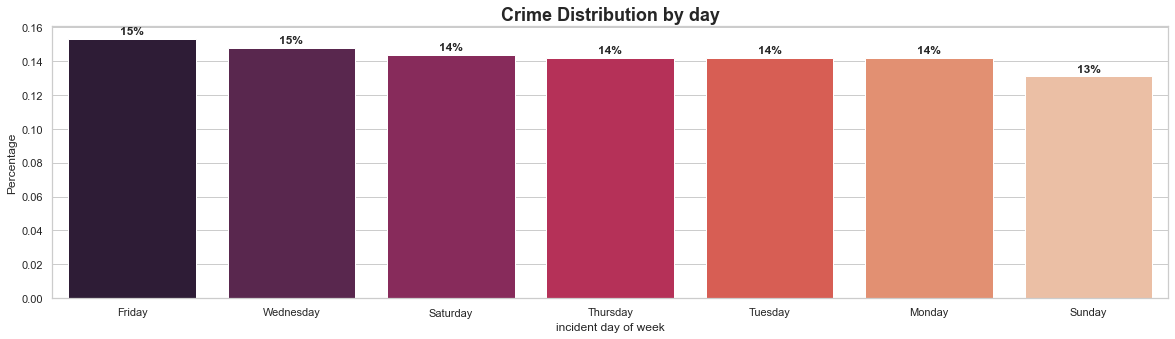

In [5]:
# 1st visualiztion: histplot of salary

sns.set_style("whitegrid")

plt.figure(figsize = (20,5))
plt.title('Crime Distribution by day', fontsize=18, fontweight='bold')
eda_percentage = sf_db['Incident Day of Week'.lower()].value_counts(normalize = True).rename_axis('Incident Day of Week'.lower()).reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Incident Day of Week'.lower(), y = 'Percentage', data = eda_percentage.head(10), palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

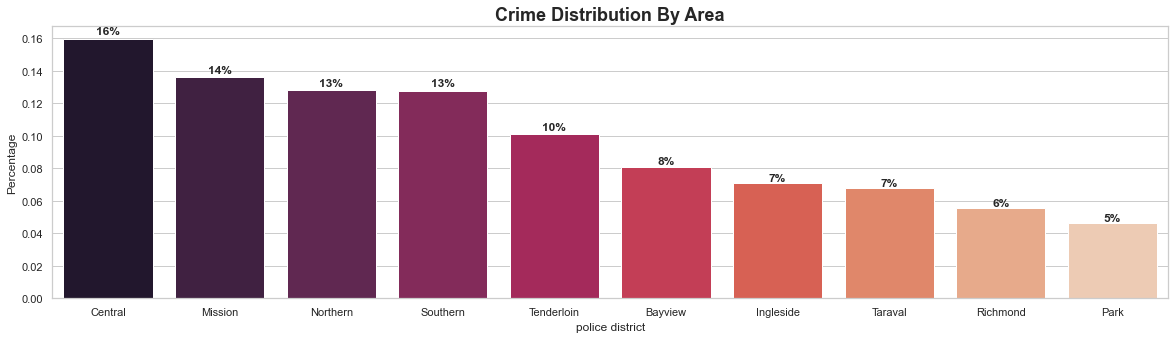

In [6]:
# 1st visualiztion: histplot of salary

sns.set_style("whitegrid")

plt.figure(figsize = (20,5))
plt.title('Crime Distribution By Area', fontsize=18, fontweight='bold')
eda_percentage = sf_db['Police District'.lower()].value_counts(normalize = True).rename_axis('Police District'.lower()).reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Police District'.lower(), y = 'Percentage', data = eda_percentage.head(10), palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

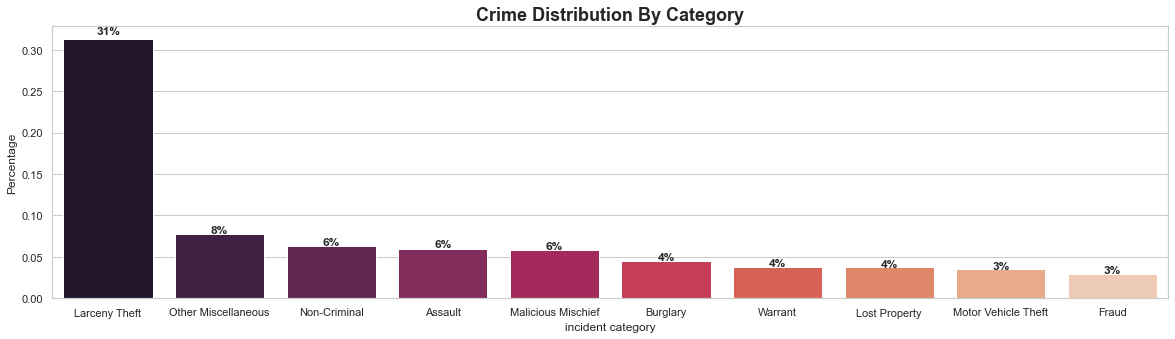

In [7]:
# 1st visualiztion: histplot of salary

sns.set_style("whitegrid")

plt.figure(figsize = (20,5))
plt.title('Crime Distribution By Category', fontsize=18, fontweight='bold')
eda_percentage = sf_db['incident category'.lower()].value_counts(normalize = True).rename_axis('incident category'.lower()).reset_index(name = 'Percentage')

ax = sns.barplot(x = 'incident category'.lower(), y = 'Percentage', data = eda_percentage.head(10), palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

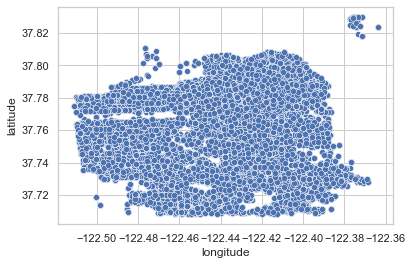

In [8]:
sns.scatterplot(x="longitude", y="latitude", data = sf_db)

In [9]:
sf_db.columns

Index(['incident day of week', 'police district', 'incident category',
       'latitude', 'longitude', 'year', 'month', 'day'],
      dtype='object')

In [10]:
sf_db = sf_db.dropna(axis=0)

In [11]:
lst = ['Robbery','Larceny Theft','Assault','Malicious Mischief','Violence Miscellaneous','Violence?',
       'Burglary','Motor Vehicle Theft','Offences Against The Family And Children',
                            'Disorderly Conduct','Traffic Violation Arrest','Other Offenses',
                            'Other','Stolen Property','Weapons Offense','Sex Offense','Arson','Family Offense',
                            'Juvenile Offenses','Vandalism','Suicide','Human Trafficking (A), Commercial Sex Acts',
                            'Rape','Homicide','Weapons Offence','Human Trafficking, Commercial Sex Acts']
for i in lst:
    sf_db['incident category'] = sf_db['incident category'].str.replace(i,'Violence',regex=False)


In [12]:
lst = ['Non-Criminal','Warrant','Fraud','Drug Offense','Lost Property','Missing Person','Violence?',
       'Prostitution','Embezzlement','Drug Violation','Violence Miscellaneous',
       'Recovered Vehicle','Suspicious Occ','Forgery And Counterfeiting', 'Gambling','Liquor Laws',
       'Weapons Carrying Etc','Case Closure','Civil Sidewalks','Courtesy Report','Traffic Collision',
       'Fire Report','Vehicle Impounded','Vehicle Misplaced','Suspicious','Miscellaneous Investigation']

for i in lst:
    sf_db['incident category'] = sf_db['incident category'].str.replace(i,'non violence', regex=False)

In [13]:
X = sf_db.drop(['incident category',], axis=1)
y = sf_db['incident category'].str.contains('Violence').astype(int)

In [14]:
X.columns

Index(['incident day of week', 'police district', 'latitude', 'longitude',
       'year', 'month', 'day'],
      dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
# Dummy encoding Training set
X_train_encoded = pd.get_dummies(X_train)
# Saving the columns in a list
cols = X_train.columns.tolist()

In [17]:
X_test_encoded = pd.get_dummies(X_test)
X_test = X_test_encoded.reindex(columns=cols).fillna(0)

In [18]:
y_test.value_counts(normalize=True)

1   0.615
0   0.385
Name: incident category, dtype: float64

In [19]:
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(x.shape[0])*benchmark_value

benchmark_value = 1

y_train_pred = get_benchmark_predictions(X_train_encoded, benchmark_value)
y_test_pred = get_benchmark_predictions(X_test_encoded, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_acc

0.615422192209882

In [20]:
models_accs = {}
model_acc = test_acc
model_name = 'benchmark'
models_accs[model_name] = model_acc
models_accs

{'benchmark': 0.615422192209882}

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

train_acc = []
test_acc = []

for i in [3,5,7,9,11,13,15,17,19,21,23,25,27,39]:
    clf = DecisionTreeClassifier(random_state=0,max_depth=i)
    clf = clf.fit(X_train_encoded, y_train)

    y_train_pred = clf.predict(X_train_encoded)
    y_test_pred = clf.predict(X_test_encoded)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

scores = train_acc, test_acc

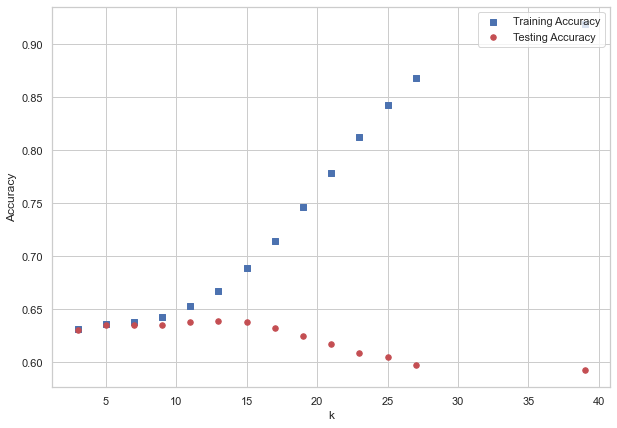

In [22]:
# This will plot the accuracies as a function of k.
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

ax1.scatter([3,5,7,9,11,13,15,17,19,21,23,25,27,39], train_acc, s=30, c='b', marker="s", label='Training Accuracy')
ax1.scatter([3,5,7,9,11,13,15,17,19,21,23,25,27,39], test_acc, s=30, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")

plt.legend(loc='upper right');
plt.show()

In [23]:
model_acc = max(test_acc)
model_name = clf.__class__.__name__
models_accs[model_name] = model_acc

In [24]:
from sklearn.ensemble import AdaBoostClassifier

for i in [1,2,3]:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = AdaBoostClassifier(random_state=0,base_estimator=clf ,n_estimators=100)
    clf = clf.fit(X_train_encoded, y_train)
    y_pred = clf.predict(X_test_encoded)
    test_acc.append(clf.score(X_test_encoded, y_test))
    print(clf.score(X_test_encoded, y_test))

0.632534015315872
0.6415568741828422
0.6467866840993663


In [25]:
model_acc = max(test_acc)
model_name = clf.__class__.__name__
models_accs[model_name] = model_acc

In [26]:
from sklearn.ensemble import RandomForestClassifier
train_acc = []
test_acc = []
for i in [3,4,5,6,7,8,9]:
    clf = RandomForestClassifier(random_state=0,max_depth=i, n_estimators=100)
    clf = clf.fit(X_train_encoded, y_train)

    y_train_pred = clf.predict(X_train_encoded)
    y_test_pred = clf.predict(X_test_encoded)

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

print(test_acc)
scores = train_acc, test_acc

[0.615422192209882, 0.6238990819097426, 0.6326202209738366, 0.6333817042858579, 0.6336115860404304, 0.6338989382336461, 0.6342724960848264]


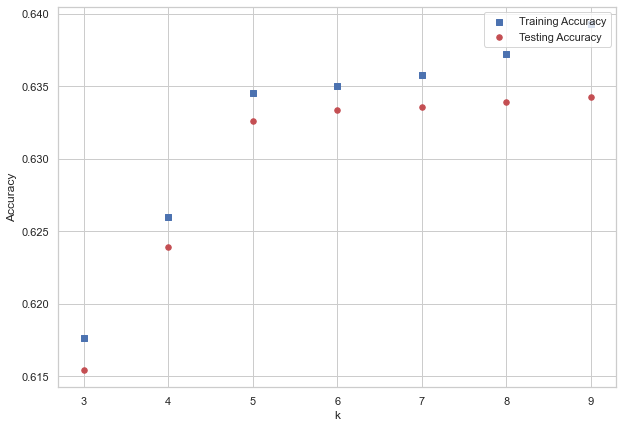

In [27]:
# This will plot the accuracies as a function of k.
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

ax1.scatter([3,4,5,6,7,8,9], train_acc, s=30, c='b', marker="s", label='Training Accuracy')
ax1.scatter([3,4,5,6,7,8,9], test_acc, s=30, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")

plt.legend(loc='upper right');
plt.show()

In [28]:
model_acc = max(test_acc)
model_name = clf.__class__.__name__
models_accs[model_name] = model_acc

In [29]:
pd.Series(models_accs, name='accuracy').sort_values(ascending=False).to_frame()

,accuracy
AdaBoostClassifier,0.647
DecisionTreeClassifier,0.639
RandomForestClassifier,0.634
benchmark,0.615


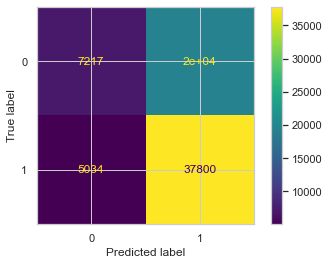

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf.classes_)

disp.plot()
plt.show()

Text(0.5, 1.0, 'Feature Importance of Random Forest Tree')

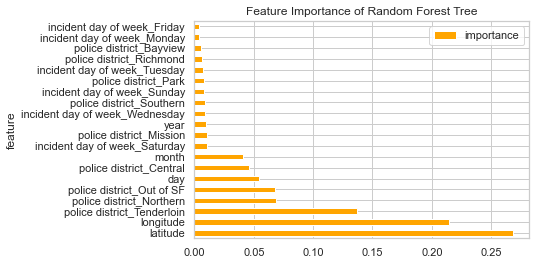

In [31]:
importance = clf.feature_importances_
features = X_train_encoded.columns
importance_df = pd.DataFrame({'feature':features, 'importance':importance})
for_graph = importance_df.sort_values('importance', ascending=False)[:20]
for_graph.plot(y='importance', x='feature', kind='barh', color='orange')
plt.title('Feature Importance of Random Forest Tree')

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

rfc_pipe = Pipeline([('dtc', DecisionTreeClassifier())])

params = [{'dtc__max_depth': [2,3,4,5,6,7,15,20,30],
         'dtc__criterion': ['gini', 'entropy'],
         'dtc__max_features': ['auto', 'sqrt', 'log2']
          }]

gs_dtc = GridSearchCV(rfc_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_dtc.fit(X_train_encoded, y_train)
y_pred = gs_dtc.predict(X_test_encoded)

print(gs_dtc.best_params_)
print(gs_dtc.best_score_)


{'dtc__criterion': 'entropy', 'dtc__max_depth': 7, 'dtc__max_features': 'auto'}
0.6304153987686646


In [33]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.567     0.132     0.215     26767
           1      0.633     0.937     0.756     42834

    accuracy                          0.628     69601
   macro avg      0.600     0.535     0.485     69601
weighted avg      0.608     0.628     0.548     69601

